<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques that are used to avoid overfitting (but haven't practiced them yet). In this project, we'll practice a fundamental method for avoiding overfitting that is commonly referred to as: _train/test split validation_. 

This is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we will be splitting the data into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California, 20 percent data from elsewhere, and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case, we've still overfit on our data set because we did not sufficiently randomize the data.

Note: In a situation like this, you could use a technique called _k-fold cross-validation_, which is cross-validation applied to more than two subsets. In particular, in k-fold cross-validation, you'd partition your data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. You would do this for each of the possible $k-1$ subsets.

# Project Requirements

The goal of this project will be to create a test-training split to compare multiple models on the same Boston housing data set. For example, you might choose to compare different linear models on the same data.

In this project, you'll fit two to three different models on the Boston housing data. For example, you could pick two different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Work with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train your model on the training data.
* Evaluate your model on the test data.
* Repeat with other variables.
* Rank the models by how well they score on the testing data set. 
* Don't forget to interpret your findings! 



A k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression

As a real estate developer, you are being asked to model the median home price of various houses in the city of Boston using data from the US census. Your goal is to predict a continuous, numeric output (price) based on a combination of discrete features that you choose.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
all_cols = X.copy()
all_cols['MEDV'] = boston.target
all_cols


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### REQUIRED: Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it _ought_ to be pretty clean, but you should always perform exploratory data analysis.

In [4]:
# Exploratory data analysis.

# Include: total nulls, index, data types, shape, summary statistics, 
# and the number of unique values for each column

X.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Based on the appearance of the data rows and indexes,
# I made the assumption that each row refers to a town 
# inside Boston city.

print(f'Data has {X.shape[0]} observations and {X.shape[1]} columns')
print(f'Data index: {X.index}')

Data has 506 observations and 13 columns
Data index: RangeIndex(start=0, stop=506, step=1)


In [6]:
# Checking for dtypes and non-null values
# All columns contain numerical data. 
# Did not find any null values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [7]:
# ZN is 0 at the 0, 25 and 50th percentile.
# CHAS is a 0 at the 0, 25, 50 and 75th percentile. It is a categorical variable.
# These features may not be useful for regression task of predicting MEDV
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


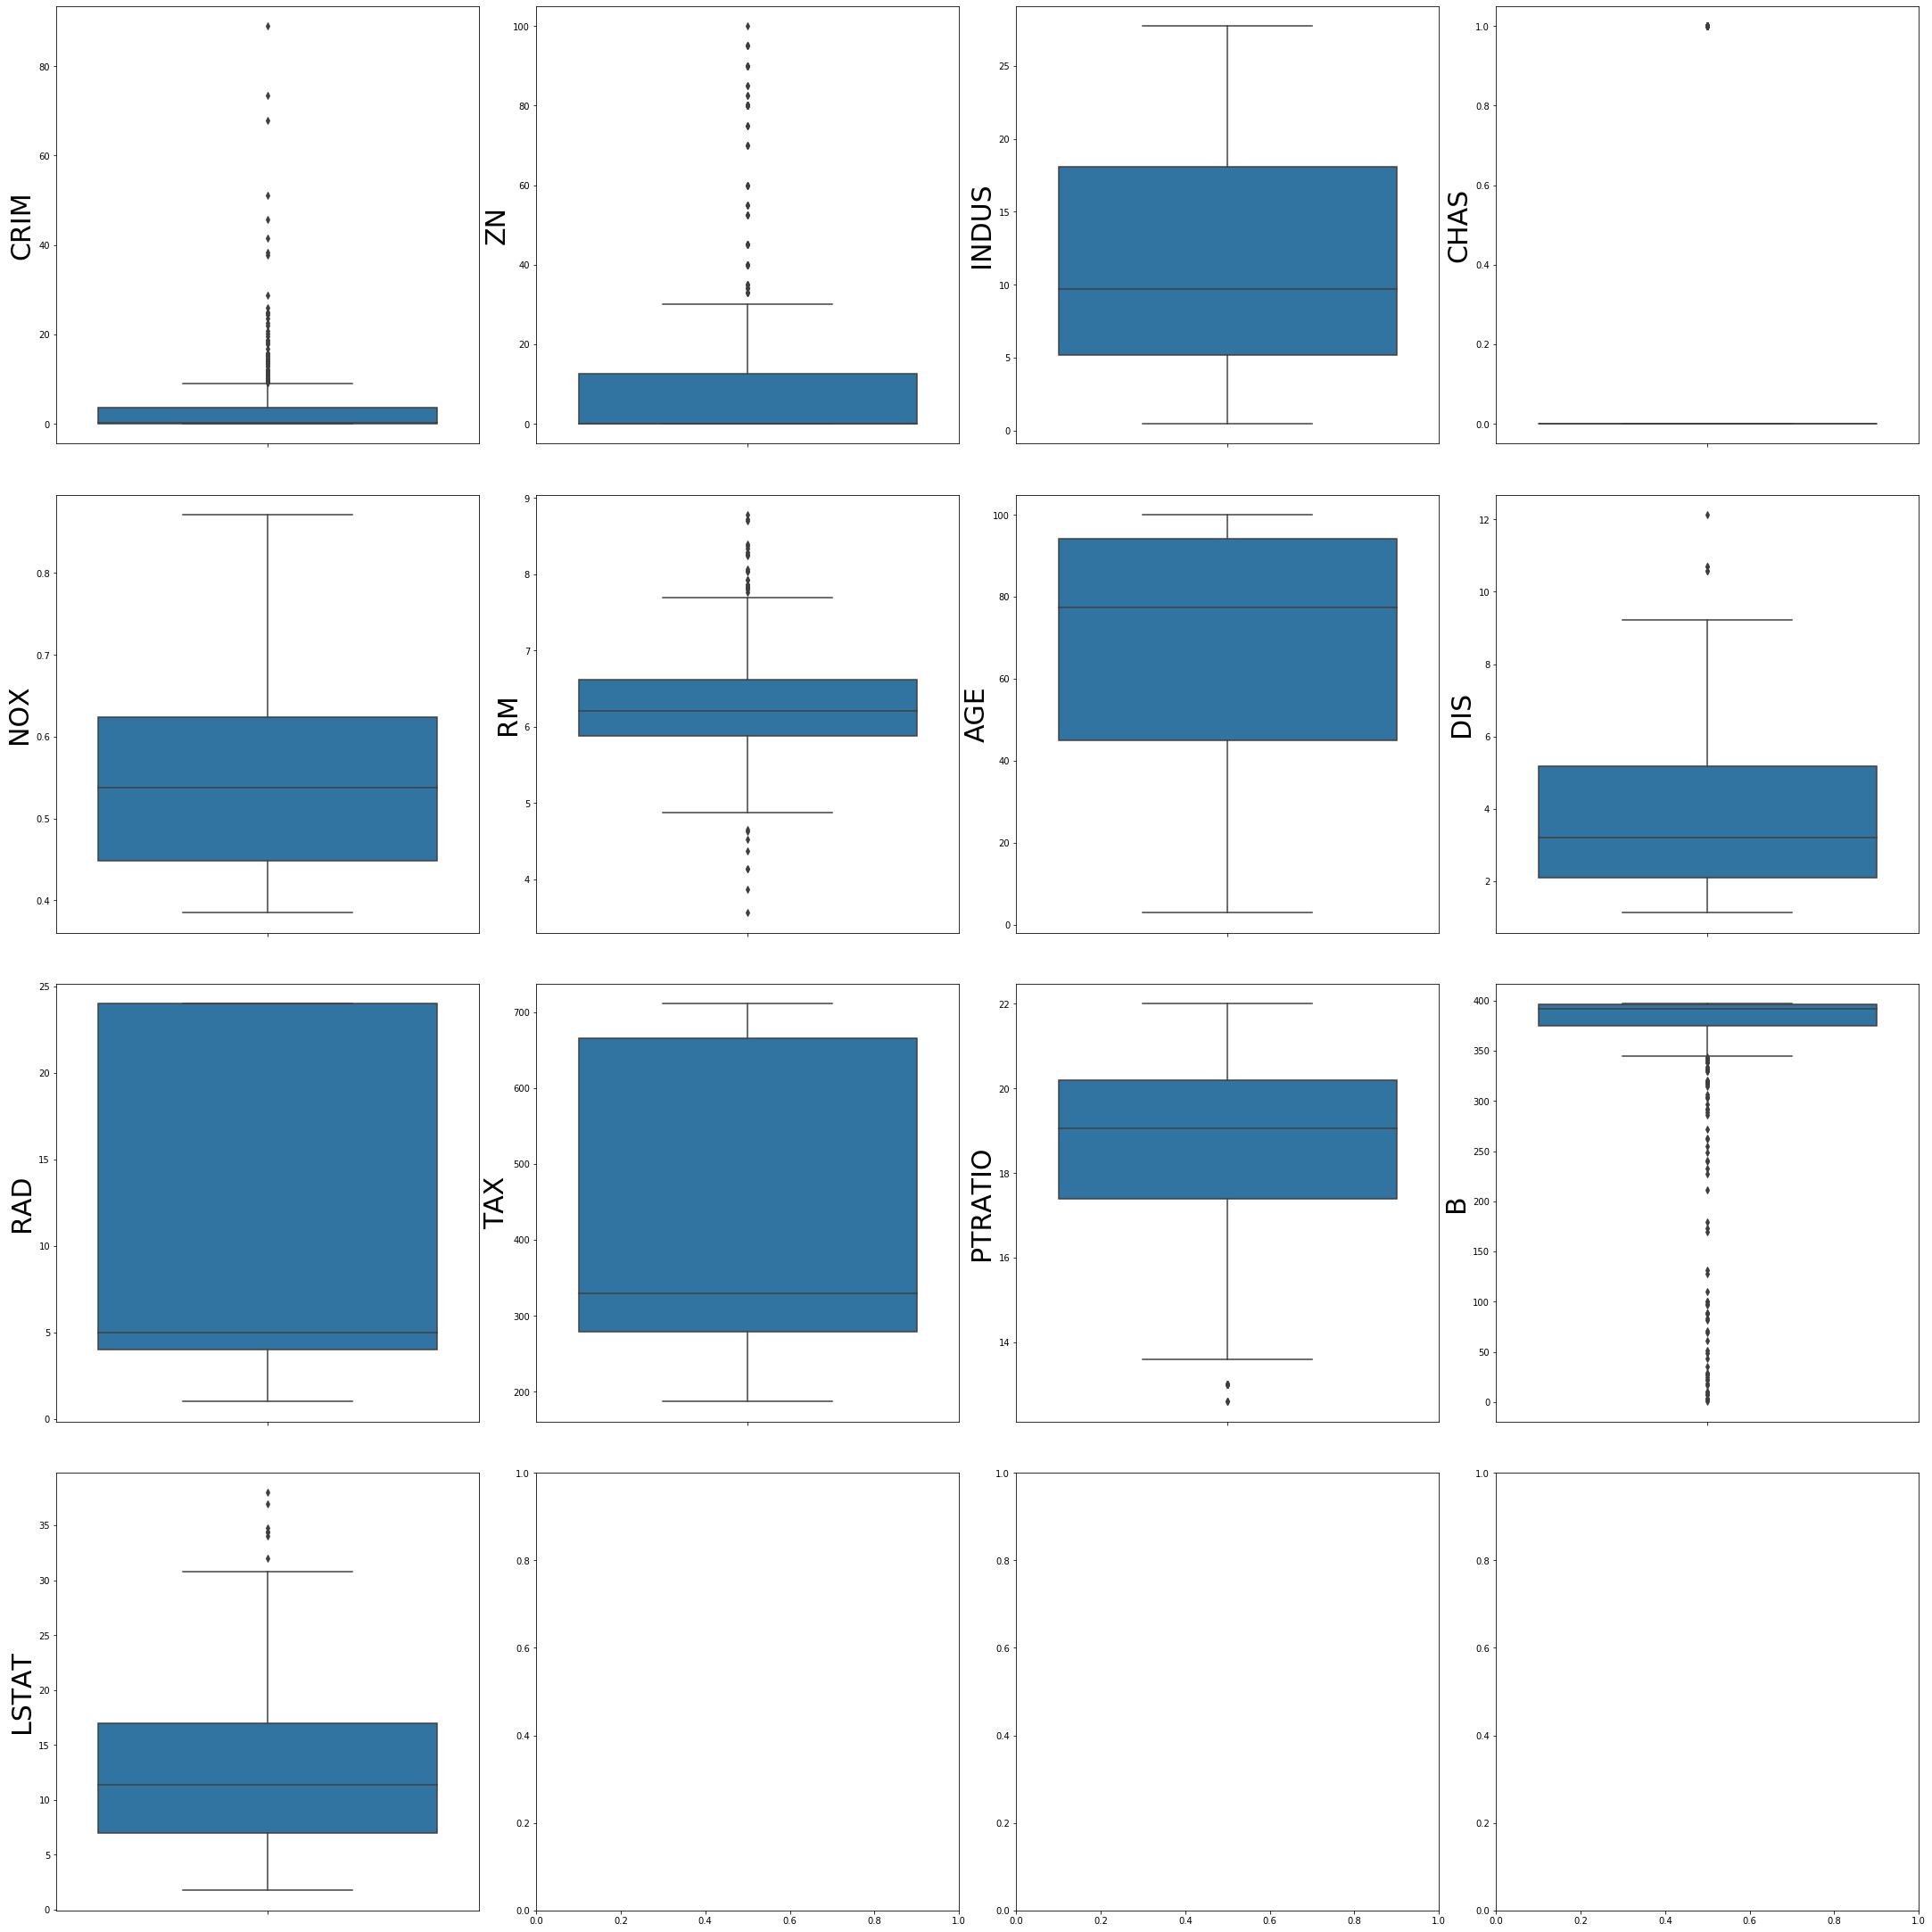

In [8]:
# Checking for outliers.
# CRIM, ZN, B, RM seem to contain sizeable portion of outliers.

import seaborn as sns
from scipy import stats

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(30,30))
index=0
axs = axs.flatten()
for k,v in X.items():
    b = sns.boxplot(y=k, data=X, ax=axs[index])
    b.set_ylabel(k, fontsize=30)
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [9]:
from collections import OrderedDict

perc_dict = dict()
for k, v in X.items():
    # Get the values in the series at the 25th and 75th quantile
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    # iqr (interquantile range) is the difference between 75th and 25th quantile
    iqr = q3 - q1
    # An outlier lies above the (Q3 + (1.5*IQR)) boundary and below the (Q1 + (1.5*IQR)) boundary
    # Return a series of the outlier values
    outlier_series = v[(v <= q1 - 1.5*iqr) | (v>=q3 + 1.5*iqr)]
    # calculate the percentage of outlier values in the feature
    pcent_outliers = (outlier_series.shape[0] / v.shape[0])*100
    perc_dict[k] = pcent_outliers 
# Display the findings
sorted_outliers = sorted(perc_dict.items(), key=lambda x:x[1], reverse=True)
for feature in sorted_outliers:
    print(f"Outliers in {feature[0]} = {feature[1]:.2f}%")

Outliers in CHAS = 100.00%
Outliers in B = 15.22%
Outliers in ZN = 13.44%
Outliers in CRIM = 13.04%
Outliers in RM = 5.93%
Outliers in PTRATIO = 2.96%
Outliers in LSTAT = 1.38%
Outliers in DIS = 0.99%
Outliers in INDUS = 0.00%
Outliers in NOX = 0.00%
Outliers in AGE = 0.00%
Outliers in RAD = 0.00%
Outliers in TAX = 0.00%


In [10]:
# Exploratory study of MEDV data column
# Did not find any null values for MEDV and all values are numerical.

print(y.describe())
print(y.info())

             MEDV
count  506.000000
mean    22.532806
std      9.197104
min      5.000000
25%     17.025000
50%     21.200000
75%     25.000000
max     50.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEDV    506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB
None


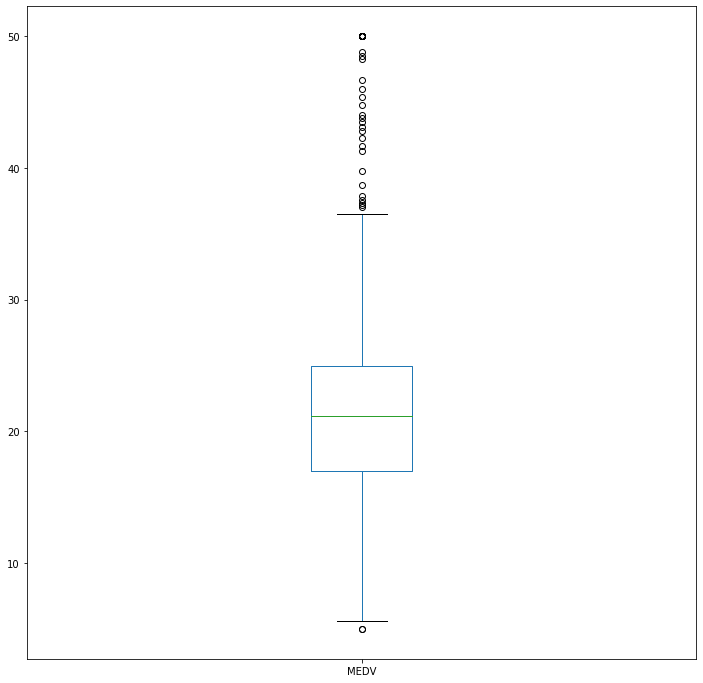

In [11]:
# There are a number of outliers for the MEDV values.
y.plot(kind='box', figsize=(12,12))

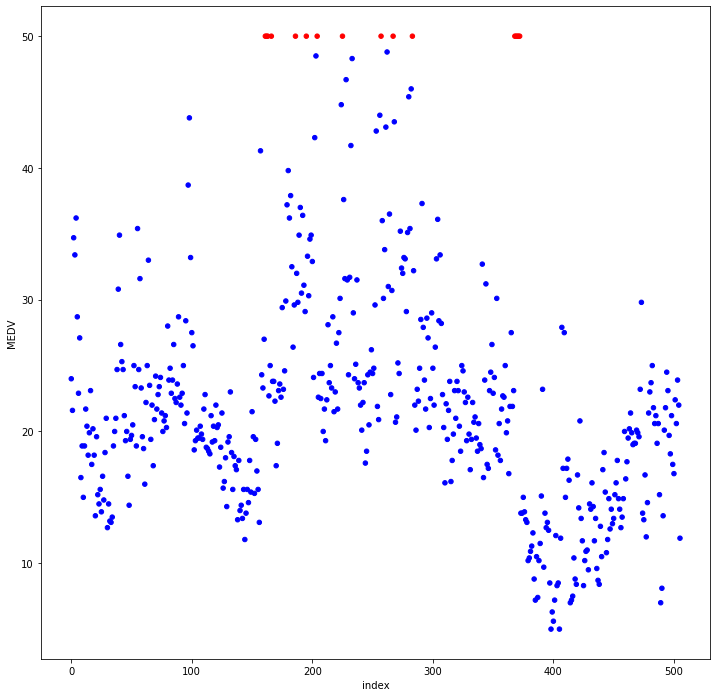

In [12]:
# The MEDV data seems to be capped at $50,000.
# Set plots with value==50 to red so that they stand out
colors = np.where(y['MEDV']==50, 'r','b')
y.reset_index().plot(kind='scatter', x='index', y='MEDV', figsize=(12,12), c=colors)

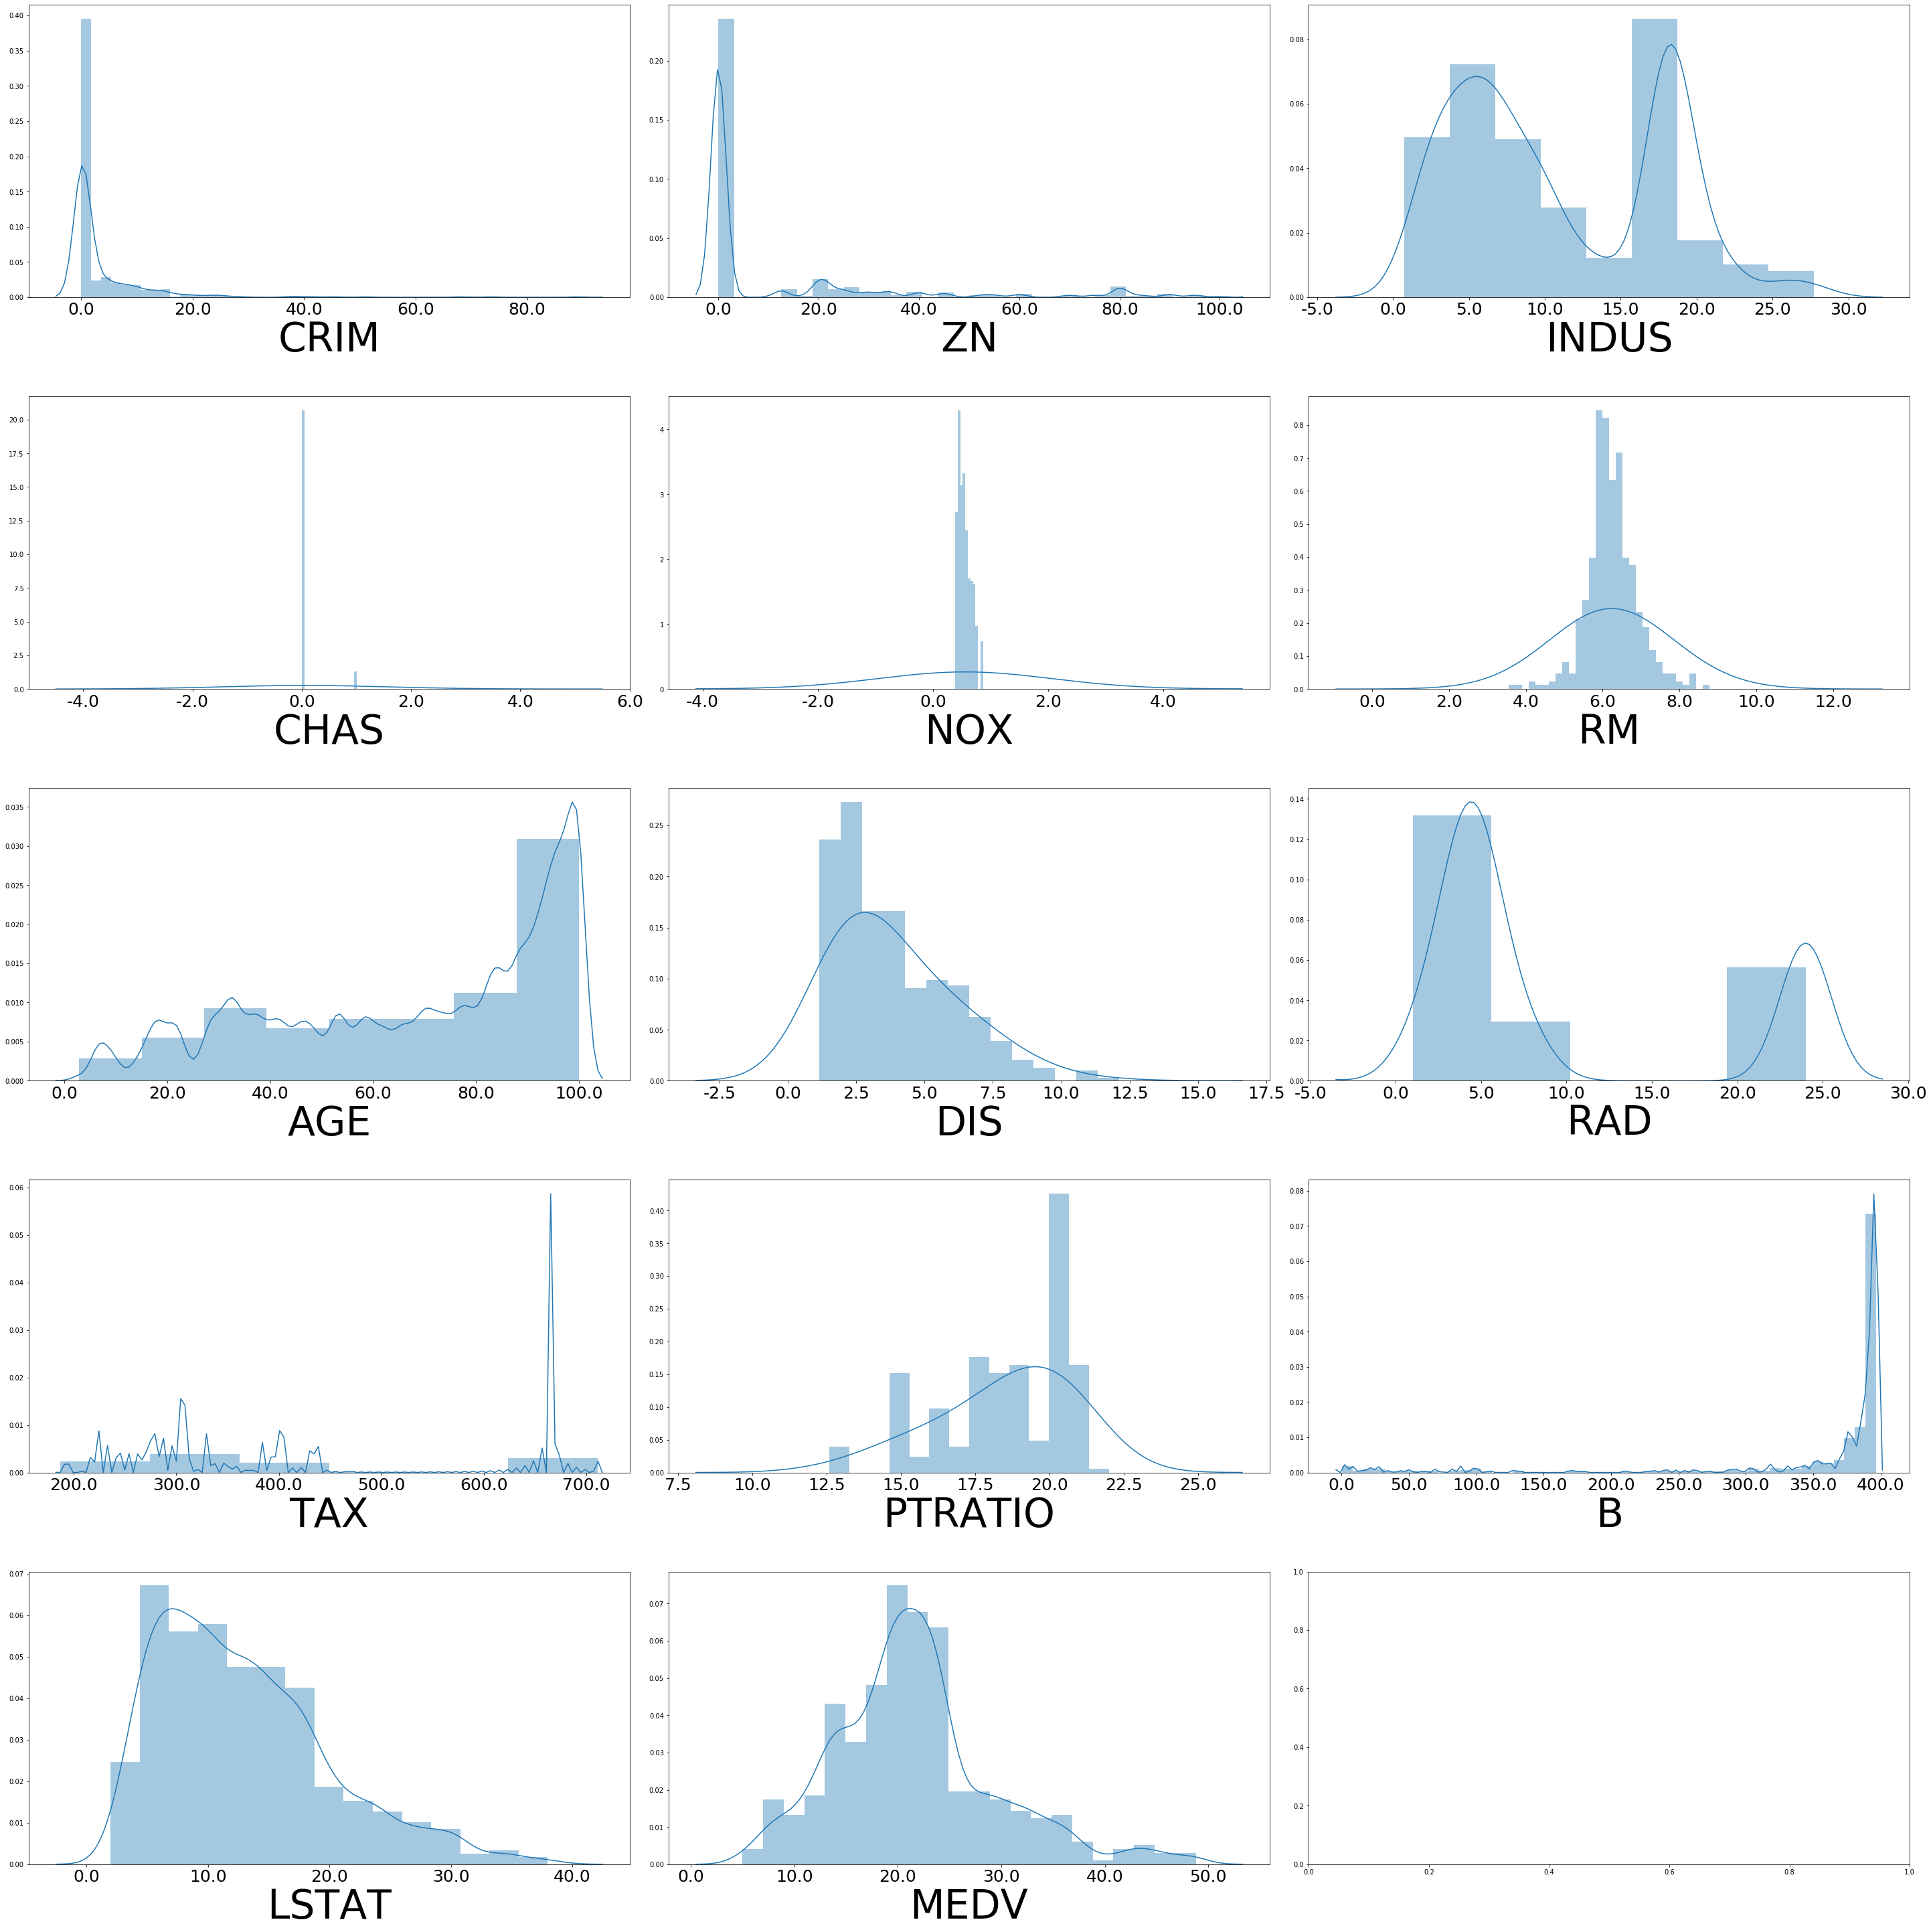

In [13]:
# Remove the observations where MEDV == 50
data = all_cols[~(all_cols['MEDV']>=50)]

# The histograms show that CRIM, ZN, B have highly skewed distributions.
# MEDV appears fairly normally distributed
# INDUS, RAD, TAX appears bimodally distributed
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(40,40))
index=0
axs = axs.flatten()
for k,v in data.items():
    d = sns.distplot(v, ax=axs[index], kde_kws={'bw':1.5})  # kde_kws and 'bw' resolves sns error 'Selected KDE bandwidth is 0. Cannot estimate density'
    d.set_xlabel(k, fontsize=60)
    d.set_xticklabels(d.get_xticks(),fontsize=25)
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

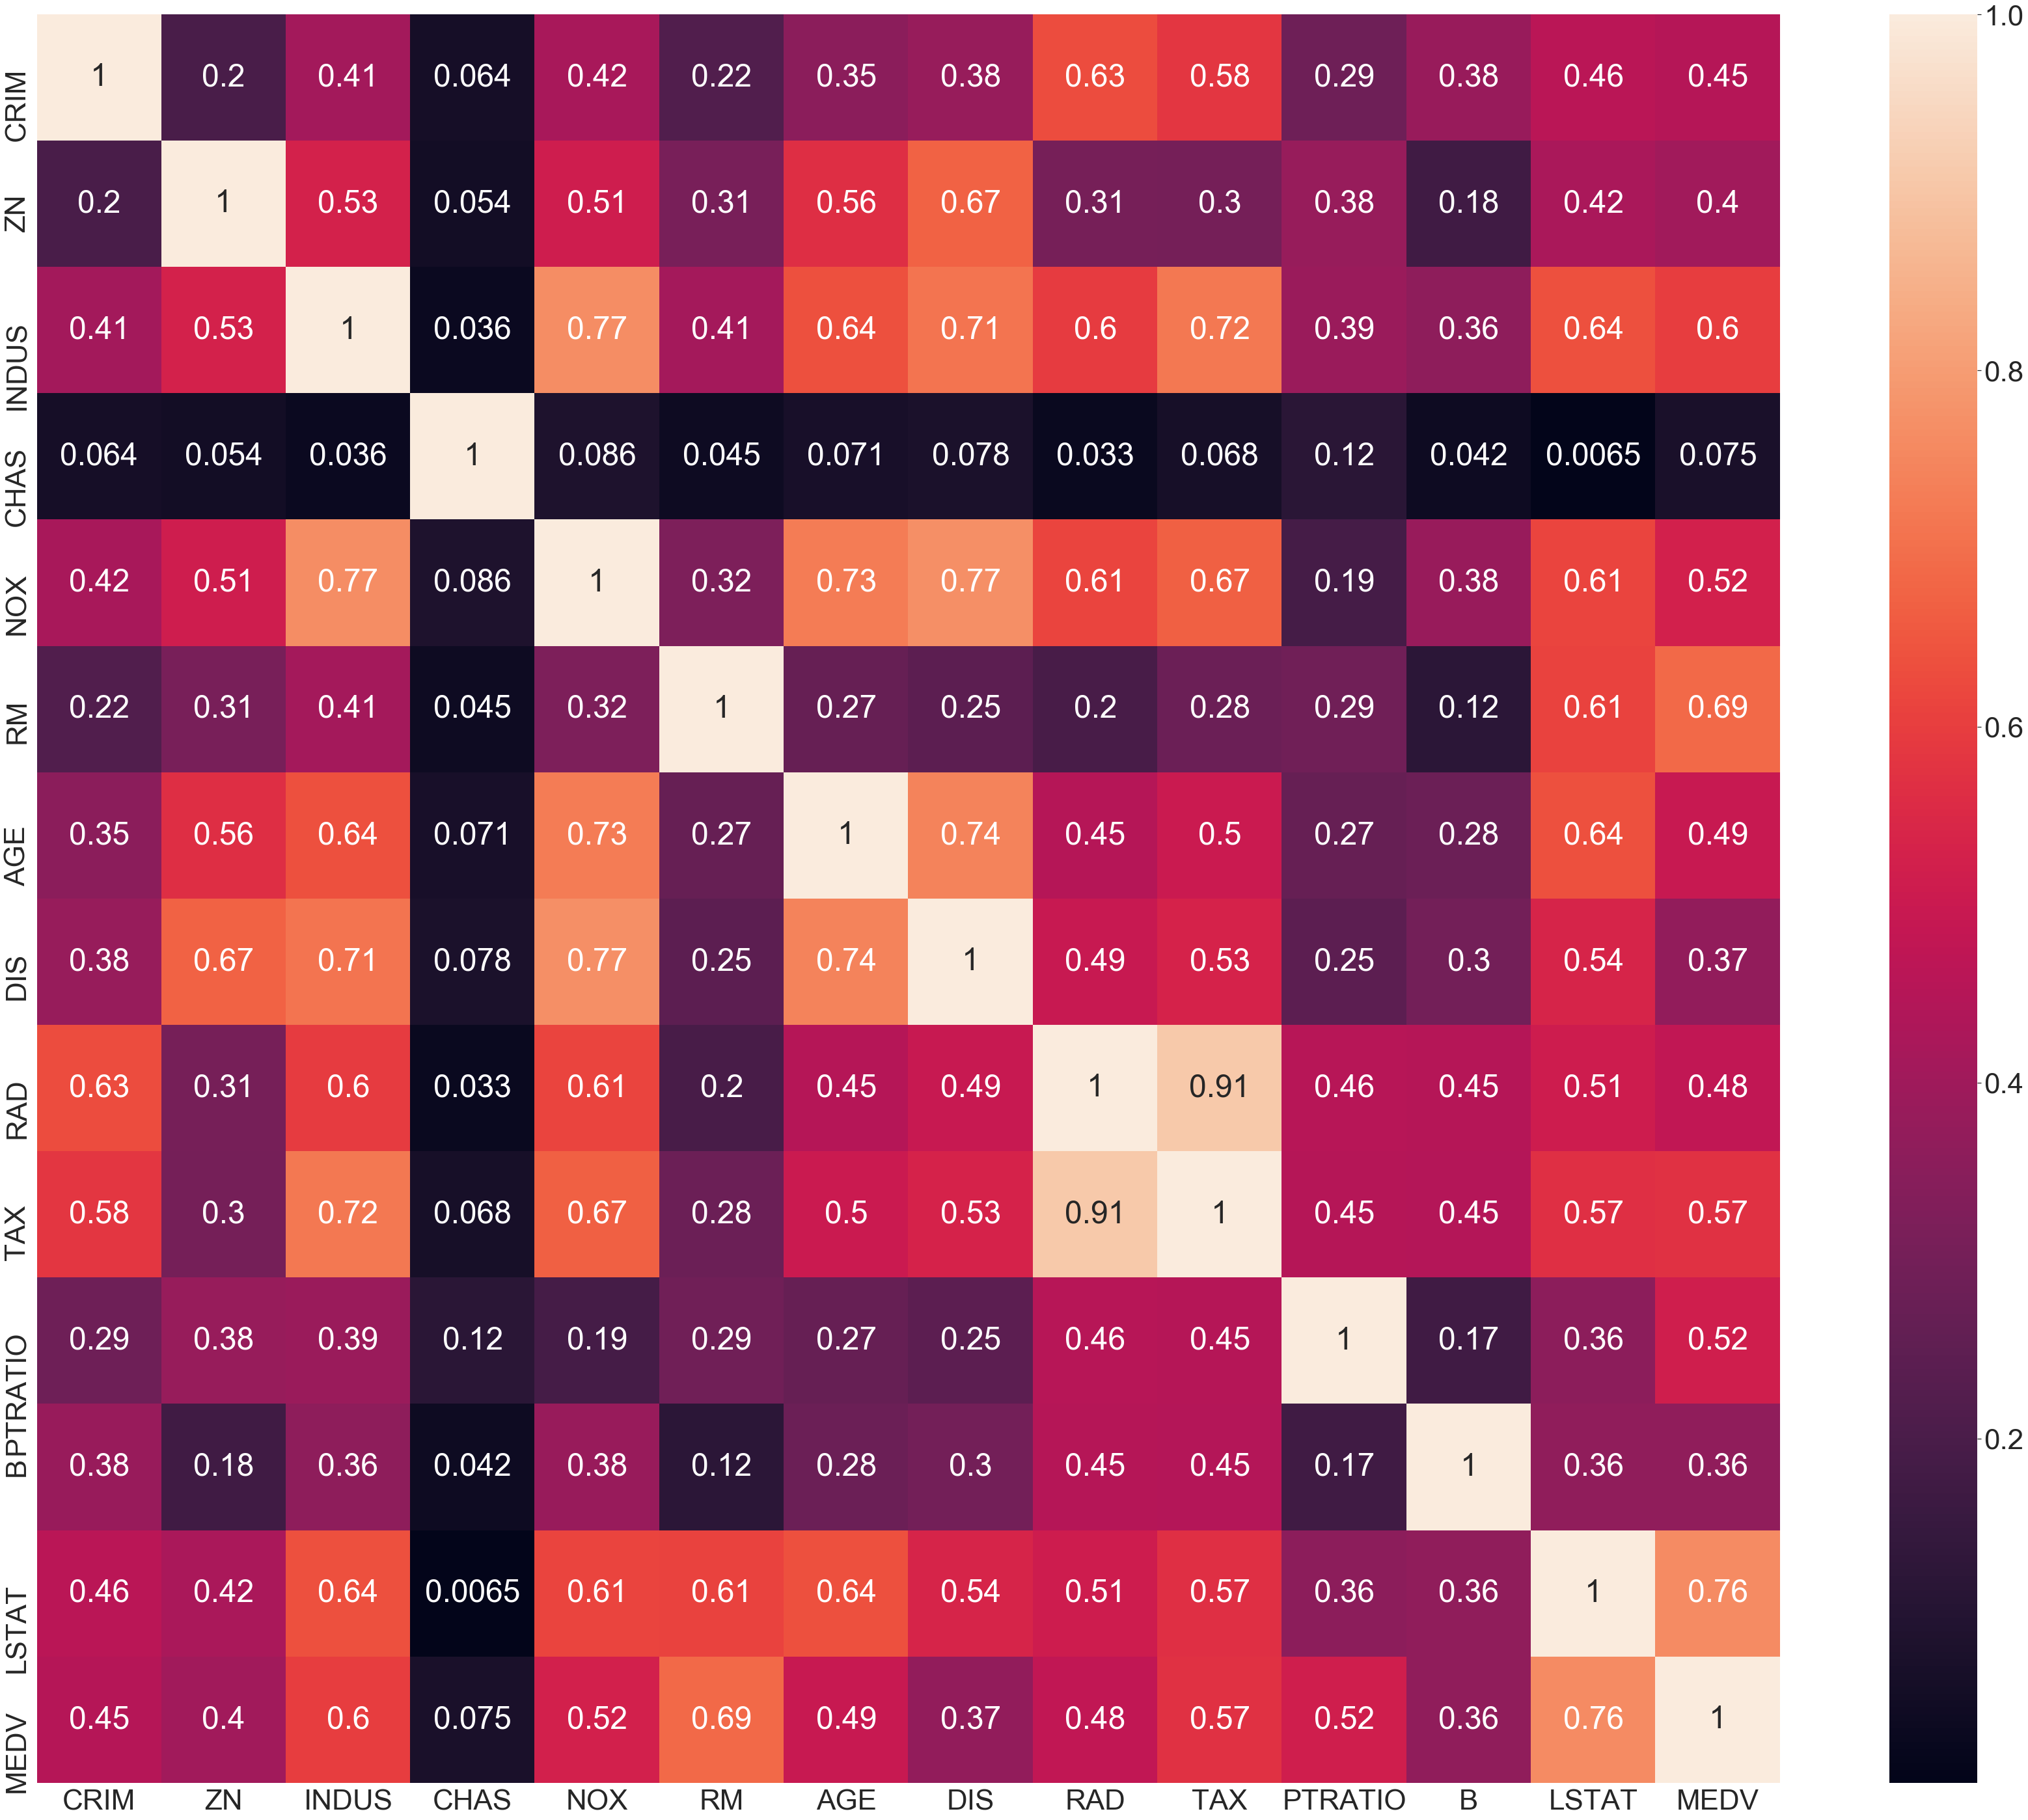

In [14]:
# Multicolinearity: TAX and RAD are highly correlated (0.91). Therefore RAD will likely be dropped.
# INDUS, NOX, RM, TAX, PTRATIO and LSTAT have correlation scores above 0.5. 
# They are promising candidates for predicting MEDV
sns.set(font_scale=4)
plt.figure(figsize=(60,50))
sns.heatmap(data.corr().abs(), annot=True)

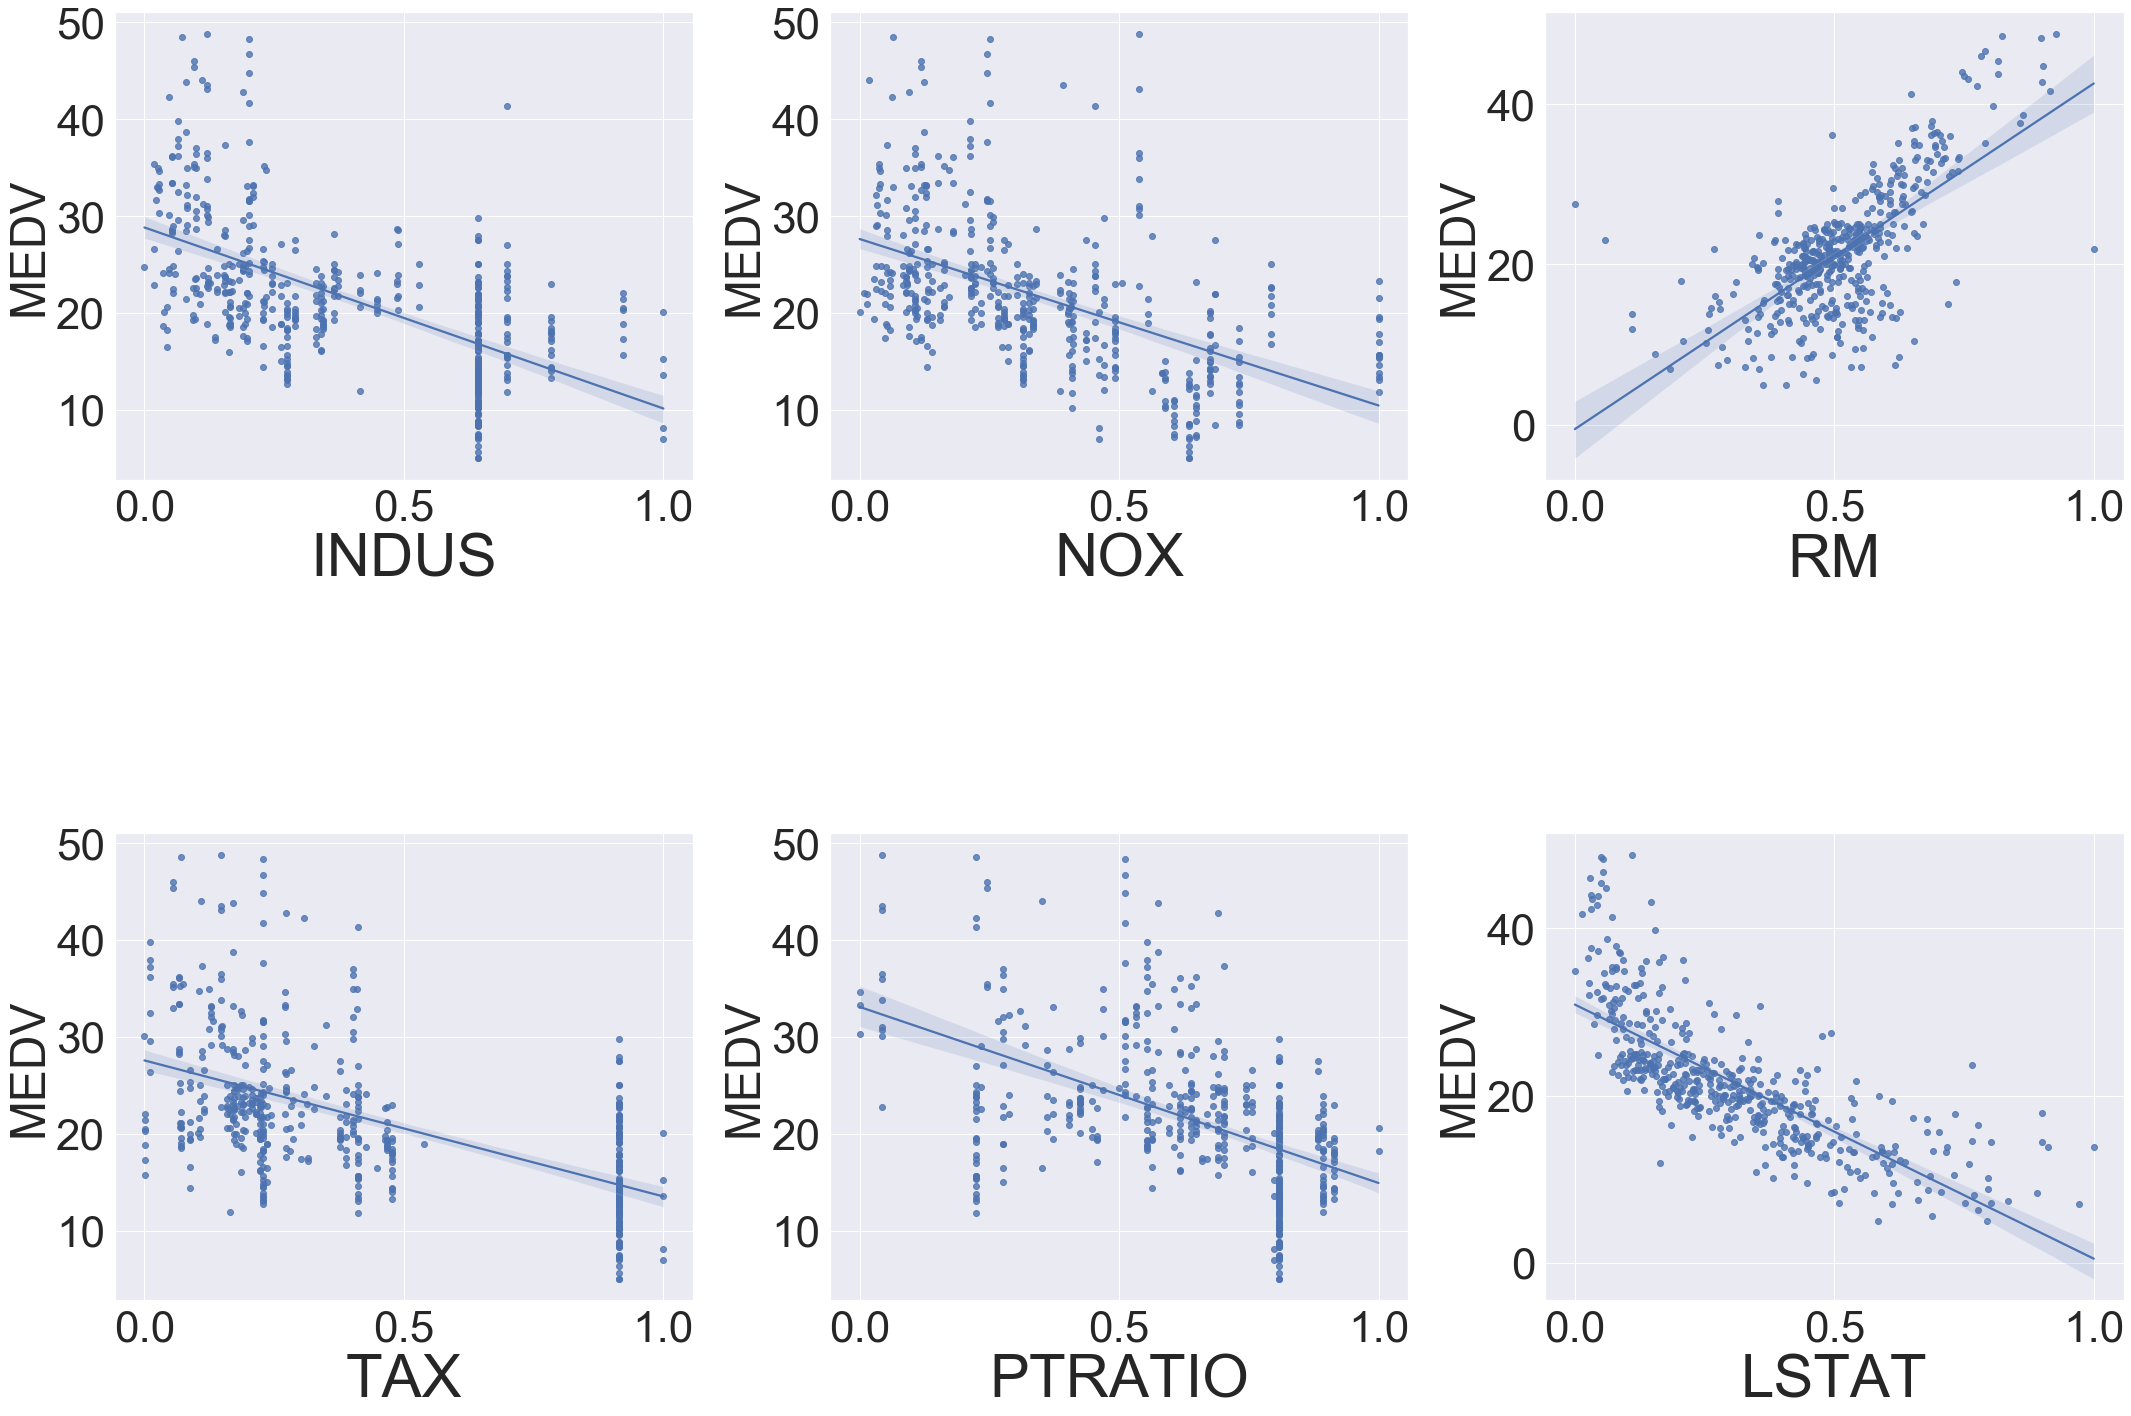

In [15]:
from sklearn import preprocessing
# Scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
predictors = ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
x = data.loc[:, predictors]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=predictors)
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(30,20))
index=0
axs = axs.flatten()
for i, k in enumerate(predictors):
    r = sns.regplot(y=y, x=x[k], ax=axs[i])
    r.set_xlabel(k, fontsize=60)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Using `scikit-learn` Linear Regression

### REQUIRED: Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict your target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [16]:
from sklearn.linear_model import LinearRegression

# Pick 4 predictors that will be used to predict the target variable MEDV
feature_cols = ['INDUS', 'RM', 'TAX', 'LSTAT']
# Create the feature matrix X that holds the values of the feature columns
X = data[feature_cols]
print('Check that feature columns have rows and 4 columns: ', X.shape)
# Create the series y to hold the values of the response variable
y = data['MEDV']
print('Check that y is a single dimension series: ', y.shape)
# Instantiate the linear regression estimator
lr = LinearRegression()
# Train the model
lr.fit(X,y)


Check that feature columns have rows and 4 columns:  (490, 4)
Check that y is a single dimension series:  (490,)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# The Intercept is at 3.5867968853096137. 
# Theoretically, when all independent values are 0, MEDV will be 3.587.
print('The intercept is ', lr.intercept_)
# The coefficients are [-0.0569328   4.52186178 -0.01022259 -0.4169365 ]

coef_list = list(zip(feature_cols, lr.coef_))
# As seen from the earlier scatter plots, only RM is positively related to the change in MEDV.
for x in coef_list:
    print(x)

The intercept is  3.5867968853096137
('INDUS', -0.05693279721614574)
('RM', 4.521861775884954)
('TAX', -0.010222593356127614)
('LSTAT', -0.41693649596394866)


In [18]:
# Produce predictions from the model
lr_predict = lr.predict(X)

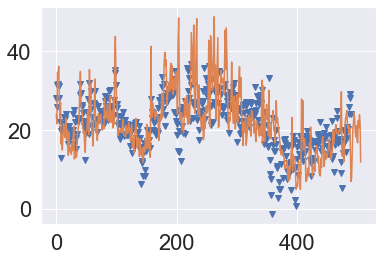

In [19]:
# Plotting the model predictions against actual values.
# The predictions track closely with the actual MEDV, but there is potentially some overfitting
sns.set(font_scale=2)
plt.plot(lr_predict, 'v')
plt.plot(y)

In [20]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse

def calculate_loss_functions(target, predict):
    # Calculate the various loss functions. The aim is to minimise these values.
    print('MAE', mae(target, predict))
    print('MSE', mse(target, predict))
    print('RMSE', np.sqrt(mae(target, predict)))

calculate_loss_functions(y, lr_predict)

MAE 3.302689081529354
MSE 18.656733923199507
RMSE 1.8173302070700728


### REQUIRED: Try 70/30 and 90/10 train/test splits: 70% of the data for training - 30% for testing, then 90% for training - 10% for testing.
Score and plot both of these approaches. How do your metrics change? What does this tell us about the size of training/testing splits? Include a written response.

In [21]:
def calculate_loss_functions(target, predict):
    # Calculate the various loss functions. The aim is to minimise these values.
    print('MAE', mae(target, predict))
    print('MSE', mse(target, predict))
    print('RMSE', np.sqrt(mae(target, predict)))

MAE 3.3026423625382377
MSE 18.257320385788212
RMSE 1.8173173532815443


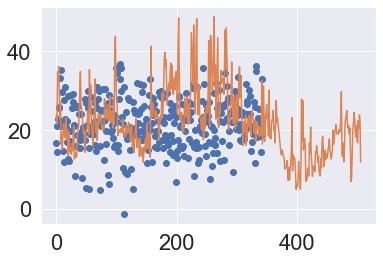

In [22]:
from sklearn.model_selection import train_test_split

# Try 70/30 train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

lr_predict = lr.predict(X_train)

plt.plot(lr_predict, 'o')
plt.plot(y)

calculate_loss_functions(target=y_train, predict=lr_predict)

# There appears to be some marginal improvements to loss function metrics when using 70/30 split

MAE 3.282941039529961
MSE 18.17510897020269
RMSE 1.8118888044054915


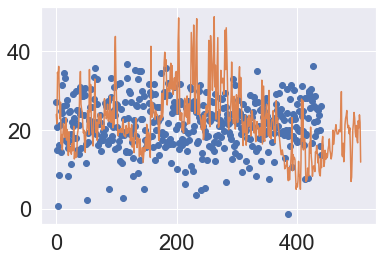

In [23]:
# Try 90/10 train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

lr_predict = lr.predict(X_train)

plt.plot(lr_predict, 'o')
plt.plot(y)

calculate_loss_functions(target=y_train, predict=lr_predict)

# The 90/10 split appears to perform poorly against both 70/30 split and no_split.

In [24]:
# There seems to be fine line between using too much data for testing, resulting in overfitting,
# and catering too little testing data, which leads to more prediction losses.

## BONUS: Try the k-fold cross-validation technique described above, varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds? Include a written response.

In [67]:
from sklearn.model_selection import cross_val_score

cv5 = cross_val_score(lr, X, y, cv=5)
print(cv5)
print(f'mean = {cv5.mean()}, stdev = {cv5.std()}')

[0.5187904  0.72861508 0.2957838  0.06330243 0.14629751]
mean = 0.3505578441584335, stdev = 0.24432258228683867


In [68]:
cv6 = cross_val_score(lr, X, y, cv=6)
print(cv6)
print(f'mean = {cv6.mean()}, stdev = {cv6.std()}')

[ 0.54755577  0.6422742   0.42394154  0.5827029  -0.39552975  0.31150827]
mean = 0.35207548741309164, stdev = 0.3515064847905288


In [69]:
cv7 = cross_val_score(lr, X, y, cv=7)
print(cv7)
print(f'mean = {cv7.mean()}, stdev = {cv7.std()}')

[ 0.56660969  0.73325964  0.58298734  0.3836473   0.28494315 -1.67559152
  0.36322147]
mean = 0.17701100968545846, stdev = 0.7697100392062975


In [70]:
cv8 = cross_val_score(lr, X, y, cv=8)
print(cv8)
print(f'mean = {cv8.mean()}, stdev = {cv8.std()}')

[ 0.57861661  0.67665791  0.68927486  0.50785438  0.55541653 -0.83450188
 -0.3809404   0.23852615]
mean = 0.25386302048751713, stdev = 0.5264264879714067


In [71]:
cv9 = cross_val_score(lr, X, y, cv=9)
print(cv9)
print(f'mean = {cv9.mean()}, stdev = {cv9.std()}')

[ 0.55312124  0.66797874  0.37623926  0.37524233  0.39443826  0.43250974
 -0.36712481 -0.62745506  0.16705645]
mean = 0.21911179334064182, stdev = 0.40844505167771866


In [72]:
cv10 = cross_val_score(lr, X, y, cv=10)
print(cv10)
print(f'mean = {cv10.mean()}, stdev = {cv10.std()}')

[ 0.57961666  0.56317346  0.73806978  0.59158654  0.56177175  0.4272899
  0.00195812 -0.95220197 -1.08317317  0.11288888]
mean = 0.1540979957402521, stdev = 0.6245994034609351


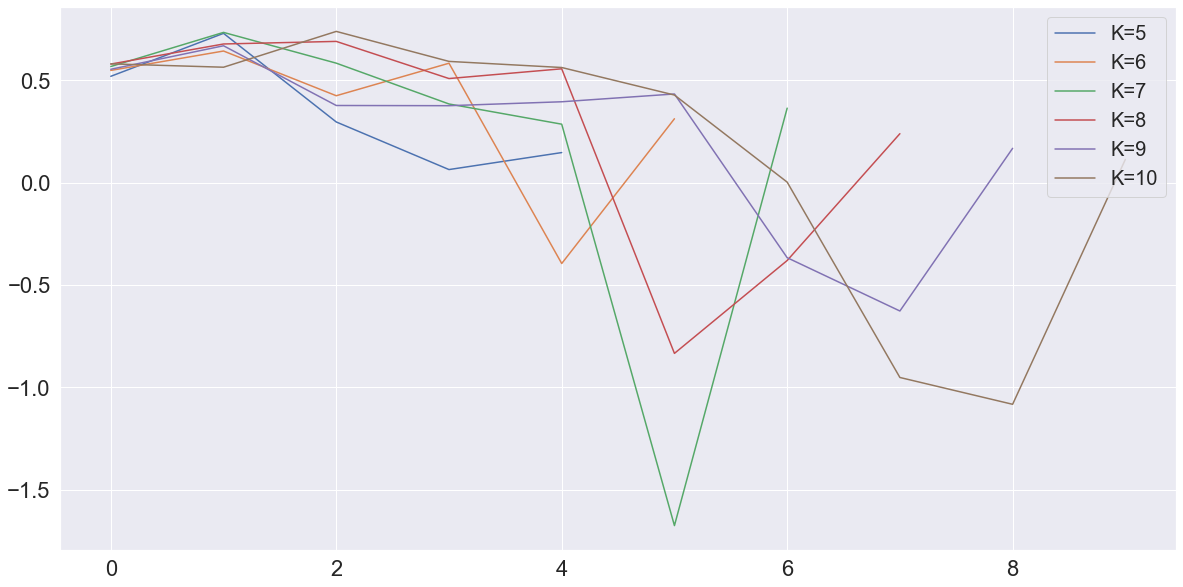

In [73]:
plt.plot(cv5, label='K=5')
plt.plot(cv6, label='K=6')
plt.plot(cv7, label='K=7')
plt.plot(cv8, label='K=8')
plt.plot(cv9, label='K=9')
plt.plot(cv10, label='K=10')
plt.legend(loc='upper right', fontsize='small')
plt.rcParams["figure.figsize"] = (20,10)

In [ ]:
# K=5 seems to be the optimal fold because the mean scores and their standard deviations seemed
# most stable, as can be seen from the above plot.

## BONUS
Practice the same workflow you just worked through above, but this time use Statsmodels instead of Sklearn for linear regression. See example formulas below.

### Example: Statsmodels Formulas

Adjust the formula using your chosen metrics from the housing data. Remember, your workflow here is the same, but the syntax is a little different. Describe your results. Are they comparable to scikit-learn's regression models?

In [8]:
# First, format your data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# Set up your new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Wed, 29 Nov 2017   Prob (F-statistic):          1.59e-321
Time:                        22:28:38   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### BONUS:

Can you optimize your R2, selecting the best features? Provide your code and explain your process in a brief written response.

### BONUS:

Given a combination of predictors, can you identify another response variable that could be accurately predicted through the exploration of different predictors in this data set?

_Tip: Consider pairplots, coefficients, or Pearson scores._

In [10]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## BONUS/DEMO: Up for an additional challenge? Try again, this time using the `patsy` library.

In [11]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [12]:
from sklearn.model_selection import train_test_split  #Note: if you didn't import this earlier, you'll need to do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [13]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.5043486813354807
